In [3]:
from numpy import array as npv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 計算時間計測

```
The slowest run took 42.30 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 753 ns per loop
```

* 100万回実行して上位3回の平均が753ナノ秒 (ns)
    * 0.753マイクロ秒(μs)
    * 0.000753ミリ秒(ms)
    * 0.000000753秒(s)
    
1秒は10億ナノ秒

In [14]:
v = np.random.random(size=(3))
%timeit np.dot(v,v)

The slowest run took 2230.56 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 731 ns per loop


# 線形独立

## 2次元ベクトル

$ a \boldsymbol{x_1} +  b \boldsymbol{x_2}$ をベクトル $ \boldsymbol{x_1}, \boldsymbol{x_2} $ の線形結合という。

$ a \boldsymbol{x_{1}} + b \boldsymbol{x_{2}}= \boldsymbol{0} $
が $ a=b=0 $ 以外で成り立つ $ a,b $ が存在するとき、 $ \boldsymbol{x_{1}}, \boldsymbol{x_{2}} $ は線形従属であるという。

線形従属でない場合、 $ \boldsymbol{x_{1}},\boldsymbol{x_{2}} $ は線形独立であるという。

## n次元ベクトル

直交座標内の成分で表された $n$ 次元のベクトルは

$ \displaystyle
  \boldsymbol{U} = \left(
    \begin{array}{c}
      U_{1}  \\
      U_{2}  \\
      \vdots  \\
      U_{n}
    \end{array}
  \right)
  = U_{1} \boldsymbol{e}_1 + U_{2} \boldsymbol{e}_2 + \dots + U_{n} \boldsymbol{e}_n
  = \sum^{n}_{k=1} U_{k} \boldsymbol{e}_k
$

# 逆行列

$
  \boldsymbol{A} = \left(
    \begin{array}{ccc}
      a_{11} & a_{12} & a_{13} \\
      a_{21} & a_{22} & a_{23} \\
      a_{31} & a_{32} & a_{33}
    \end{array}
  \right)
$

について $ \boldsymbol{A} $ の行列式

$ \rm{det} ~ \boldsymbol{A} = a_{11}a_{22}a_{33} + a_{21}a_{32}a_{13} + a_{31}a_{12}a_{23} - a_{11}a_{32}a_{23} - a_{31}a_{22}a_{13} - a_{21}a_{12}a_{33} \not= 0$

のとき、$ \boldsymbol{A} $の逆行列は

$
  \boldsymbol{A}^{-1} = \frac{1}{\rm{det} ~ \boldsymbol{A}} = \left(
    \begin{array}{ccc}
      a_{22}a_{33} - a_{23}a_{32} & a_{13}a_{32} - a_{12}a_{33} & a_{12}a_{23} - a_{13}a_{22} \\
      a_{23}a_{31} - a_{21}a_{33} & a_{11}a_{33} - a_{13}a_{31} & a_{13}a_{21} - a_{11}a_{23} \\
      a_{21}a_{32} - a_{22}a_{31} & a_{12}a_{31} - a_{11}a_{32} & a_{11}a_{22} - a_{12}a_{21}
    \end{array}
  \right)
$

In [28]:
### ベクトルを生成
a1 = npv([1, 2, 5])
a2 = npv([6, 5, 4])
a3 = npv([0, 8, 4.5])

### 3×3行列を生成
matrix_a1a2a3 = np.c_[a1, a2, a3]
print ("matrix_a1a2a3 = \n {0} \n".format(matrix_a1a2a3))

### 行列式
det_matrix_a1a2a3 = np.linalg.det(matrix_a1a2a3)
print ("det_matrix_a1a2a3 = \n {0} \n".format(det_matrix_a1a2a3))

### 逆行列
inv_matrix_a1a2a3 = np.linalg.inv(matrix_a1a2a3)
print ("inv_matrix_a1a2a3 = \n {0} \n".format(inv_matrix_a1a2a3))

### 行列の積
matrix_a1a2a3_product_inv_matrix_a1a2a3 = np.dot(matrix_a1a2a3, inv_matrix_a1a2a3)
print ("matrix_a1a2a3_product_inv_matrix_a1a2a3 = \n {0} \n".format(matrix_a1a2a3_product_inv_matrix_a1a2a3))

### 順番を変えた行列の積
inv_matrix_a1a2a3_product_matrix_a1a2a3 = np.dot(inv_matrix_a1a2a3, matrix_a1a2a3)
print ("inv_matrix_a1a2a3_matrix_a1a2a3_product = \n {0} \n".format(inv_matrix_a1a2a3_product_matrix_a1a2a3))

matrix_a1a2a3 = 
 [[ 1.   6.   0. ]
 [ 2.   5.   8. ]
 [ 5.   4.   4.5]] 

det_matrix_a1a2a3 = 
 176.49999999999994 

inv_matrix_a1a2a3 = 
 [[-0.05382436 -0.1529745   0.27195467]
 [ 0.17563739  0.02549575 -0.04532578]
 [-0.09631728  0.14730878 -0.03966006]] 

matrix_a1a2a3_product_inv_matrix_a1a2a3 = 
 [[  1.00000000e+00  -1.38777878e-17   5.55111512e-17]
 [  1.11022302e-16   1.00000000e+00   0.00000000e+00]
 [ -2.77555756e-17  -8.32667268e-17   1.00000000e+00]] 

inv_matrix_a1a2a3_matrix_a1a2a3_product = 
 [[  1.00000000e+00   0.00000000e+00   5.55111512e-17]
 [  2.77555756e-17   1.00000000e+00   1.38777878e-17]
 [ -2.77555756e-17   5.55111512e-17   1.00000000e+00]] 



# 固有値、固有ベクトル

与えられた正方行列 $ \boldsymbol{A} $ の固有値、固有ベクトルを求める

* 固有値
    * 行列 $ \boldsymbol{A} $ の固有方程式 $ \rm{det} ~ ( \boldsymbol{A} - \lambda \boldsymbol{I} ) = 0 $ を未知数 $ \lambda $ の方程式として解いて固有値 $ \lambda $ を求める
* 固有ベクトル
    * 各々の固有値を連立方程式 $ ( \boldsymbol{A} - \lambda \boldsymbol{I} ) \boldsymbol{x} = \boldsymbol{0} $ に代入して、対応する固有ベクトル $ \boldsymbol{x} $ を求める
    * 固有ベクトルの定数倍もまた固有ベクトルとなるので、固有ベクトルを答えるときは任意定数をつけた形で答える
* 正規化
    * 固有ベクトルの長さを1(単位長さ)にする $ \frac{ \boldsymbol{A} }{ | \boldsymbol{A} | } $

In [2]:
### ベクトルを生成
a1 = npv([1, 0, 0])
a2 = npv([1, 2, 0])
a3 = npv([2, -1, 3])

### 3×3行列を生成
matrix_a1a2a3 = np.c_[a1, a2, a3]
print ("matrix_a1a2a3 = \n {0} \n".format(matrix_a1a2a3))

### 固有値、固有ベクトルを計算 (正規化済み)
la, v = np.linalg.eig(matrix_a1a2a3)

print (la)
print (v)

print (la[0])
print (v[:,0])

print (la[1])
print (v[:,1])

print (la[2])
print (v[:,2])


matrix_a1a2a3 = 
 [[ 1  1  2]
 [ 0  2 -1]
 [ 0  0  3]] 

[ 1.  2.  3.]
[[ 1.          0.70710678  0.33333333]
 [ 0.          0.70710678 -0.66666667]
 [ 0.          0.          0.66666667]]
1.0
[ 1.  0.  0.]
2.0
[ 0.70710678  0.70710678  0.        ]
3.0
[ 0.33333333 -0.66666667  0.66666667]


# Python

## 基本

In [10]:
### データ型
### 「型」と「クラス」は同じ意味で使われることがある

### int
print (type(10))

### float
print (type(3.14))

### str
print (type("hello"))

<class 'int'>
<class 'float'>
<class 'str'>


In [24]:
### リスト
### 配列のこと

a = [1,2,3,4,5]
print (a)
print (type(a))

### リストの長さを取得
print (len(a))

### 最初の要素にアクセス
print (a[0])

### 値を代入
a[4] = 99
print (a)

### スライシング記法によるリストのサブリスト(部分リスト)へのアクセス
print ("--- スライシング記法 ---")
print (a[0:2])
print (a[1:])
print (a[:3])
print (a[:-1])
print (a[:-2])

[1, 2, 3, 4, 5]
<class 'list'>
5
1
[1, 2, 3, 4, 99]
--- スライシング記法 ---
[1, 2]
[2, 3, 4, 99]
[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3]


In [29]:
### ディクショナリ
### キーと値をペアとして格納するハッシュや連想配列みたいなもの

me = {'height':180}
print (me)
print (type(me))

### 新しい要素を追加
me['weight'] = 70
print (me)


{'height': 180}
<class 'dict'>
{'height': 180, 'weight': 70}


In [35]:
### ブーリアン
### TrueかFalseのどちらかを取る

### hungryではある
hungry = True
print (hungry)
print (type(hungry))

### sleepyではない
sleepy = False
print (sleepy)

### hungryでは無いかどうか
### hungryはTrueなので結果はFalse
print (not hungry)

### hungryかつsleepyか
### hungryではあるがsleepyではないのでFalse
print (hungry and sleepy)

### hungryもしくはsleepyか
### hungryではあるのでTrue
print (hungry or sleepy)

True
<class 'bool'>
False
False
False
True


In [38]:
### if文
### インデントはタブを使っても表現できるが、4つの空白文字を使うのが一般的

hungry = True
if hungry:
    print("I'm hungry")

hungry = False
if hungry:
    print("I'm hungry")
else:
    print("I'm not hungry")
    print("I'm sleepy")

I'm hungry
I'm not hungry
I'm sleepy


In [40]:
### for文
for i in [1, 2, 3]:
    print(i)

1
2
3


In [47]:
### 関数
### まとまりのある処理を関数として定義することができる

def hello():
    print("Hello World!")

hello()

### 引数を取ることができる
def hello(object):
    print("Hello " + object + "!")

hello("Cat")

Hello World!
Hello Cat!


In [54]:
### クラス
### これまでのtype()で表示できるデータ型は「組み込み」のデータ型で初めからPythonに組み込まれている
### ここでは新しいクラスを定義する
### -> 独自にデータ型(クラス)を作成することができる
### -> オリジナルのメソッド(クラス用の関数)や属性を定義することができる

### Manという新しいクラスを定義
class Man:
    ### __init__ は初期化を行うための特別なメソッド
    ### コンクラスタとも呼ばれ、クラスのインスタンスが作成される際に一度だけ呼ばれる
    ### Pythonではメソッドの第一引数に自分自身のインスタンスを表すselfを明示的に書く
    ### nameという引数をとり、その引数でインスタンス変数であるself.nameを初期化する
    def __init__(self, name):
        ### self.nameのように、selfの後に属性名を書くことでインスタンス変数の作成及びアクセスが可能
        self.name = name
        print("Initialized!")

    def hello(self):
        print("Hello " + self.name + "!")

    def goodbye(self):
        print("Good-bye " + self.name + "!")

### Manというクラスからｍというインスタンス(オブジェクト)を生成
m = Man("David")
print (type(m))
m.hello()
m.goodbye()

Initialized!
<class '__main__.Man'>
Hello David!
Good-bye David!


## NumPy

外部ライブラリ読み込み

```
import numpy as np
```

* importで外部ライブラリを読み込む
* この書き方で以降はNumPyに関するメソッドはnpとして参照可能

### NumPyの算術演算

* 演算する配列は要素数が同じでなければならない
    * 要素数が同じでない場合はエラーになる
    * 英語
        * 要素ごと : element-wise
        * 要素ごとの積 : element-wise product
    * element-wiseな計算だけではなく、NumPy配列と単一の数値(スカラ値)の計算も可能
        * NumPy配列の各要素とスカラ値の間で計算が行われる
        * 「ブロードキャスト」という機能

In [64]:
import numpy as np

### np.array()というメソッドでPythonのリストを引数にとりNumPy用の配列を作成
### 要素数が3の１次元配列
x = np.array([1.0, 2.0, 3.0])
print (x)
print ("x = {0}".format(x))
print (type(x))

### NumPy配列の算術計算
y = np.array([2.0, 4.0, 6.0])
print ("y = {0}".format(y))
print("x + y = {0}".format(x + y))
print("x - y = {0}".format(x - y))
print("x * y = {0}".format(x * y))
print("x / y = {0}".format(x / y))

### 各要素とスカラ値の計算
print("x / 2.0 = {0}".format(x / 2.0))

[ 1.  2.  3.]
x = [ 1.  2.  3.]
<class 'numpy.ndarray'>
y = [ 2.  4.  6.]
x + y = [ 3.  6.  9.]
x - y = [-1. -2. -3.]
x * y = [  2.   8.  18.]
x / y = [ 0.5  0.5  0.5]
x / 2.0 = [ 0.5  1.   1.5]


### NumPyのN次元配列

* 数学との対応
    * 1次元配列 : ベクトル
    * 2次元配列 : 行列
    * 3次元以上 : テンソル
        * 本来はベクトルや行列を一般化したものをテンソルという
            * ベクトルも行列もテンソル
        * ここでは3次元以上をテンソル、もしくは多次元配列と言う事にする

In [75]:
### 行列(2次元配列)の作成
A = np.array([[1, 2],[3, 4]])
print("A = \n {0}".format(A))

### Aの形状(2行2列)
print (A.shape)

### 要素のデータ型
print (A.dtype)

### 行列の演算
B = np.array([[3, 0],[0, 6]])
print("B = \n {0}".format(B))

print("A + B = \n {0}".format(A + B))
print("A * B = \n {0}".format(A * B))
print("A * 10 = \n {0}".format(A * 10))

A = 
 [[1 2]
 [3 4]]
(2, 2)
int64
B = 
 [[3 0]
 [0 6]]
A + B = 
 [[ 4  2]
 [ 3 10]]
A * B = 
 [[ 3  0]
 [ 0 24]]
A * 10 = 
 [[10 20]
 [30 40]]


### ブロードキャスト

* スカラ値と行列の掛け算を行うとき、スカラ値が行列の要素に拡大されて演算される機能
* 1次元配列と2次元配列が同じ形状になるように賢く変形してくれる

In [82]:
### 行列(2次元配列)の作成
A = np.array([[1, 2],[3, 4]])
print("A = \n {0}".format(A))
B = np.array([10, 20])
print("B = \n {0}".format(B))

### スカラと　行列の演算
print("A * 10 = \n {0}".format(A * 10))

### 1次元配列と2次元配列の演算
print("A * B = \n {0}".format(A * B))


A = 
 [[1 2]
 [3 4]]
B = 
 [10 20]
A * 10 = 
 [[10 20]
 [30 40]]
A * B = 
 [[10 40]
 [30 80]]


### 要素へのアクセス

In [103]:
X = np.array([[51,55], [14,19], [0,41]])
print("X = \n {0}".format(X))
print(X[0])
print(X[1][0])

### for分を使って各要素にアクセス
for row in X:
    print(row)

for row in X:
    for i in row:
        print(i)

### 1次元配列に変換
print (X.flatten())

### forでループ
for row in X.flatten():
    print (row)

### インデックスが0,2,4番目の要素を取得
print (X.flatten()[np.array([0,2,4])])

### 値が14より大きいの要素のみ取得
print (X.flatten() > 14)
print (X[X>14].flatten())

X = 
 [[51 55]
 [14 19]
 [ 0 41]]
[51 55]
14
[51 55]
[14 19]
[ 0 41]
51
55
14
19
0
41
[51 55 14 19  0 41]
51
55
14
19
0
41
[51 14  0]
[ True  True False  True False  True]
[51 55 19 41]


## Matplotlib

* グラフ描画のためのライブラリ

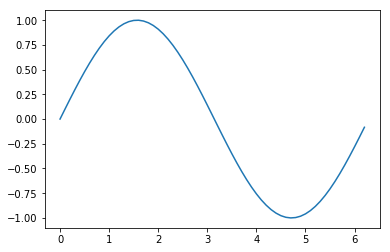

In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### データの作成
### 0から2πまで0.1刻みで値を生成
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x)

### グラフの描画
plt.plot(x, y)
plt.show()

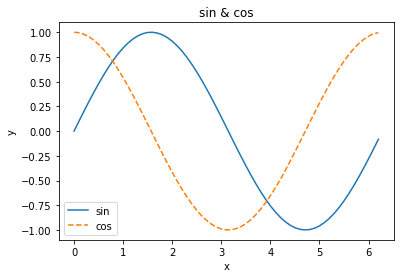

In [117]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### データの作成
### 0から2πまで0.1刻みで値を生成
x = np.arange(0, 2*np.pi, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

### グラフの描画
plt.plot(x, y1, label="sin")

### cosは破線で描画
plt.plot(x, y2, linestyle = "--", label="cos")

### 軸のラベル
plt.xlabel("x")
plt.ylabel("y")

### タイトル
plt.title('sin & cos')

### 凡例の表示
plt.legend()

### 図の描画
plt.show()

### 画像の表示

* 画像の表示
    * 画像表示のimshow()メソッドを使う
* 画像の読み込み
    * matplotlib.imageモジュールのimread()を利用する

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

### imreadメソッドで画像を読み込み
img = imread('lena.png')

### 画像を表示
plt.imshow(img)

plot.show()